<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: Arya Kulkarni<br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>: aak213<br>
<b>NetID 2 (optional)</b>:<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: AK


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional): 3.4 date and time combine columns<br>
</div>

### CS 439 - Introduction to Data Science
### Fall 2020

# Midsemester Project : Twitter Analysis

### Due Date : November 11th, 2020 by 11:59 PM.###


### About this project
This is your mid-semester project. You are allowed to work with a partner (if you'd like). Only one partner (or max two per group is allowed). The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. Moreoover, Trump tweets has become so consequential, they actually can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick either candiadate (Hillary Clinton or Donald Trump) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets
It is important to download the most recent tweets (especially if you are working as a group). Those who are working by themselves are allowed to use the downloaded files w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [2]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

## PART 1:  Accessing Twitter API  (optional for individuals)
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder. PART 1 is optional for those working by themselves. However, we highly recommend that you do Part 1 (after completing the project with offline data) if you would like to "learn" how to use Twitter API that might be useful.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en/apply/) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


In [3]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o erros or warnings and display yur twitter username. If you are working as a team, try to get a new twitter account with user names as :  student1NetId_Student2NetId (eg:  ds1089_adg133)

In [4]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

Your username is: aarea51_


## PART 2 - Working with Twitter
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [5]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [6]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

### Task 2.1 (Optional for Individuals)

### What you need to do. 

Re-factor the above code fragment into reusable snippets below.  You should not need to make major modifications; this is mostly an exercise in understanding the above code block. 

In [7]:
# fine
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN SOLUTION
   
    f = open(path, "r")
    print(f)
    data = json.loads(f.read())
        
    return data

    ### END SOLUTION


In [8]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
    ### BEGIN SOLUTION
    
    # set key values
    consumer_key = keys["consumer_key"]
    consumer_secret = keys["consumer_secret"]
    access_key = keys["access_token"]
    access_secret = keys["access_token_secret"]
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
    # Access to user's access key and access secret 
    auth.set_access_token(access_key, access_secret) 
  
    # Calling api 
    api = tweepy.API(auth) 
    ds_tweets_save_path = "data/" + user_account_name+".json"
    print("Path of new file: " + ds_tweets_save_path)
    
    # get tweets
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id=user_account_name, 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)
        
    print("Length = " + str(len(example_tweets)))
    ### END SOLUTION


In [9]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    ### BEGIN SOLUTION
    with open(path, "r") as f:
        tweets = json.load(f)
    
    from pprint import pprint # ...to get a more easily-readable view.
    #pprint(tweets[0]['full_text'])
    return tweets
    ### END SOLUTION
#load_tweets("data/aarea51_.json")

In [10]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    ### BEGIN SOLUTION
    
    # your solution here

    import os.path
    from os import path
    
    result = []
    keys = load_keys(keys_path)
   
    file = "data/" + user_account_name + ".json"
    if(path.isfile(file)):
        # dont download, reload tweets from saved file
        print("LOADING FROM DISK CACHE -----------------------")
        result = load_tweets(file)
    else:
        print("Downloading Tweets ----------------------------")
        result = download_recent_tweets_by_user(user_account_name, keys)    
    
    return result
    ### END SOLUTION


If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by the realdonaldtrump. (This may take a few minutes)

In [11]:
# When you are done, run this cell to load @realdonaldtrump's tweets.
    # Note the function get_tweets_with_cache.  You may find it useful
# later.
trump_tweets = get_tweets_with_cache("realdonaldtrump", key_file)
print("Number of tweets downloaded:", len(trump_tweets))

<_io.TextIOWrapper name='keys.json' mode='r' encoding='UTF-8'>
LOADING FROM DISK CACHE -----------------------
Number of tweets downloaded: 21


### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [12]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [13]:
dest_path = "data/2017-2018.json"
trump_tweets = load_tweets(dest_path)


If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [14]:
assert 2000 <= len(trump_tweets) <= 4000
#print(len(trump_tweets))

If the assert statement above works, then continue on to task 2.3.

### Task 2.3

Find the number of the month of the oldest tweet.

In [15]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 8

### BEGIN SOLUTION

months = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}

max = 0;
day= []
monthS1 =[] 
month = []
time = []
year = []
for i in range(0,len(trump_tweets)):
    #print(trump_tweets[i]['created_at'])
    x = trump_tweets[i]['created_at'].split()
    day.append(x[2])
    monthS1.append(x[1])
    time.append(x[3])
    year.append(x[5])
    
for i in range(0,len(monthS1)):
    month.append(months[monthS1[i]])


keys = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# make dataframe
monthF = {'Month': month, 'Day': day, 'Year': year}
df = pd.DataFrame(data=monthF)
df
datetimes = pd.to_datetime(df)

oldest = min(datetimes)

date = oldest.strftime("%D")

# get oldest month
oldest_month = date[0:2]
oldest_month
### END SOLUTION

'10'

## PART 3  Twitter Source Analysis



### Task 3.1

Create a new date frame from `2016-2017.json` and merge with `trump_tweets` 

**Important:** There may/will be some overlap so be sure to eliminate duplicate tweets. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. 
**Hint:** the `id` of a tweet is always unique.

In [16]:
# if you do not have new tweets, then all_tweets is the same as  old_trump_tweets

### BEGIN SOLUTION

with open('data/2016-2017.json', 'rb') as f:
    df_last = json.load(f)
df_last
# first dataframe
df_old = pd.DataFrame(df_last)
df_old
df_new = pd.DataFrame(trump_tweets)
df_new

df1 = df_old[['id', 'created_at', 'source', 'text', 'retweet_count']] 
df2 = df_new[['id', 'created_at', 'source', 'full_text', 'retweet_count']]
df2 = df2.rename(columns={'full_text': 'text'})
df1.loc[:, 'id'] = df1['id'].astype('int64')
df2.loc[:, 'id'] = df2['id'].astype('int64')
#print(df1.id.dtype)
df1 = df1.set_index('id')
df2 = df2.set_index('id')
df1 = pd.DataFrame(df1)

bigdata = df2.append(df1, ignore_index=False)
all_tweets = bigdata
### END SOLUTION

assert(all_tweets.size == 40176) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [17]:
### BEGIN SOLUTION
df = all_tweets

df.loc[:, 'time'] = pd.to_datetime(df.loc[:, 'created_at'])
df.drop('created_at', axis=1, inplace=True)
df_trump = df
df_trump
### END SOLUTION

,source,text,retweet_count,time
id,,,,
1052233253040640001,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,5415,2018-10-16 16:22:11+00:00
1052232230972678145,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @WhiteHouse: https://t.co/RNqLpOtS3O,4478,2018-10-16 16:18:08+00:00
1052219253384994816,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",13103,2018-10-16 15:26:33+00:00
1052217314463100928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,6271,2018-10-16 15:18:51+00:00
1052213711295930368,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",14594,2018-10-16 15:04:32+00:00
...,...,...,...,...
682805477168779264,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,2016-01-01 06:08:06+00:00
682805320217980929,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,2016-01-01 06:07:28+00:00
682792967736848385,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,2016-01-01 05:18:23+00:00


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [18]:
df_trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       'Twitter for iPhone', 'Media Studio', 'Twitter for iPad',
       'Twitter Web Client', 'Twitter Ads', 'Twitter for Android',
       'Periscope', 'TweetDeck', 'Instagram', 'Mobile Web (M5)'],
      dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [19]:
### BEGIN SOLUTION
import re

source = df_trump['source'].str.replace('<[^<]+?>', '')
df = pd.DataFrame(source)
df

### END SOLUTION

,source
id,
1052233253040640001,Twitter for iPhone
1052232230972678145,Twitter for iPhone
1052219253384994816,Twitter for iPhone
1052217314463100928,Twitter for iPhone
1052213711295930368,Twitter for iPhone
...,...
682805477168779264,Twitter for Android
682805320217980929,Twitter for iPhone
682792967736848385,Twitter for iPhone


### Make a plot to find out the most common device types used in accessing twitter

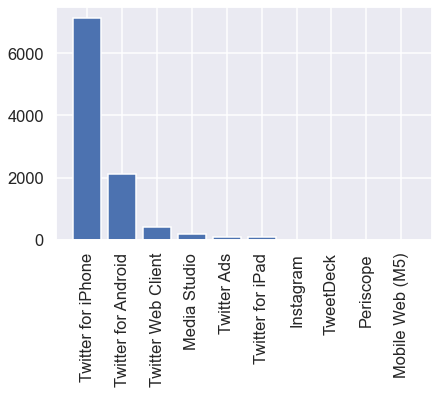

In [20]:
### BEGIN SOLUTION

a_d = source.value_counts().to_dict()

keys = a_d.keys()
values = a_d.values()

plt.bar(range(len(a_d)), list(a_d.values()), align='center')
plt.xticks(range(len(a_d)), list(a_d.keys()))
plt.xticks(rotation=90)
plt.show()

### END SOLUTION

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

In [21]:
df_trump['time'][0:3]

id
1052233253040640001   2018-10-16 16:22:11+00:00
1052232230972678145   2018-10-16 16:18:08+00:00
1052219253384994816   2018-10-16 15:26:33+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [22]:
df_trump['time'] = pd.to_datetime(df_trump['time'], errors='coerce')
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump
df_trump.head()


,source,text,retweet_count,time,est_time
id,,,,,
1052233253040640001,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,5415,2018-10-16 16:22:11+00:00,2018-10-16 11:22:11-05:00
1052232230972678145,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @WhiteHouse: https://t.co/RNqLpOtS3O,4478,2018-10-16 16:18:08+00:00,2018-10-16 11:18:08-05:00
1052219253384994816,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",13103,2018-10-16 15:26:33+00:00,2018-10-16 10:26:33-05:00
1052217314463100928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,6271,2018-10-16 15:18:51+00:00,2018-10-16 10:18:51-05:00
1052213711295930368,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",14594,2018-10-16 15:04:32+00:00,2018-10-16 10:04:32-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24')]

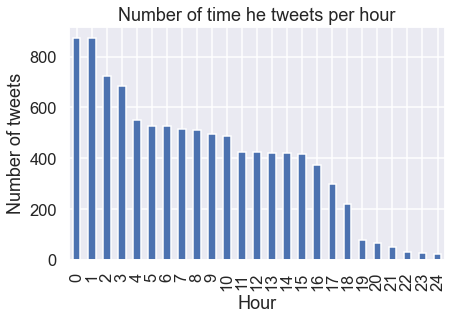

In [23]:
df_trump['hour'] = df_trump.est_time.apply(lambda x: x.hour + x.minute/60 + x.second/3600)
df_trump['roundtime']=round(df_trump['hour'])
# make a bar plot here
### BEGIN SOLUTION

hour_arr = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

####

ax = df_trump['roundtime'].value_counts().plot.bar(x='lab', y='val')
ax.set_title("Number of time he tweets per hour")
ax.set_xlabel('Hour')
ax.set_ylabel('Number of tweets')
ax.set_xticklabels(hour_arr,rotation=90)

### END SOLUTION

In [24]:
assert np.isclose(df_trump.loc[690171032150237184]['hour'],8.93639)

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 
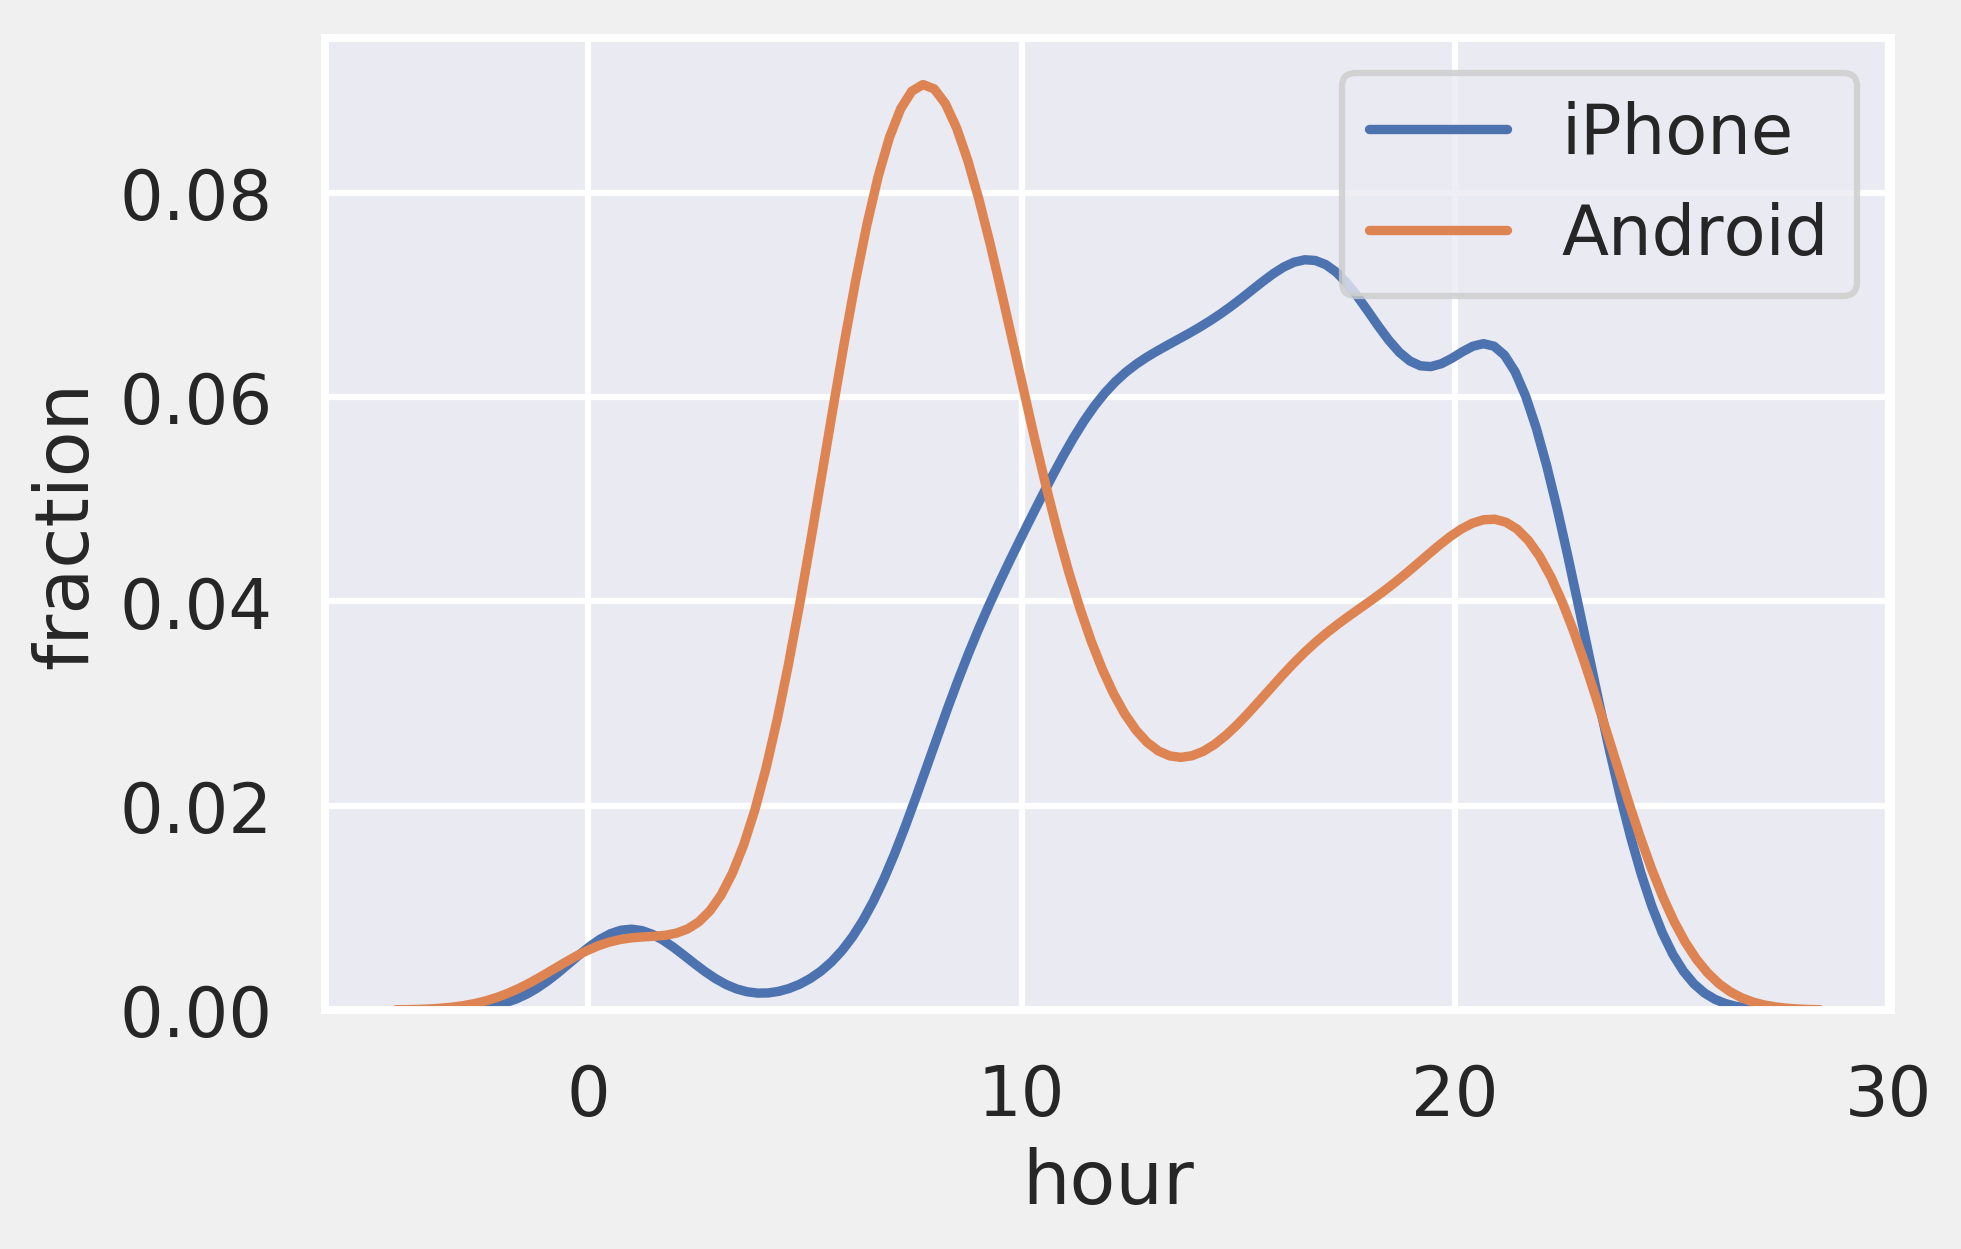


<ipython-input-25-8e55bc80cd93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone['hour'] = df_trump.groupby('source').get_group('Twitter for iPhone')['hour']
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
<ipython-input-25-8e55bc80cd93>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

[Text(0.5, 0, 'Hour'), Text(0, 0.5, 'Fraction')]

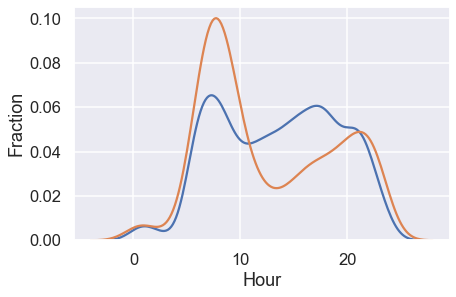

In [25]:
### BEGIN SOLUTION
### make your plot here
import matplotlib.pyplot as plt

# get data for iPhone
iPhone = df_trump.groupby('source').get_group('Twitter for iPhone')
iPhone['hour'] = df_trump.groupby('source').get_group('Twitter for iPhone')['hour']
x = iPhone['hour']

ax = sns.distplot(x, kde=True, hist=False)
ax


Andr = df_trump.groupby('source').get_group('Twitter for Android')
Andr['hour'] = df_trump.groupby('source').get_group('Twitter for Android')['hour']
y = Andr['hour']

ax1 = sns.distplot(y, kde=True, hist=False)
ax1

ax.set(xlabel='Hour', ylabel='Fraction')
### END SOLUTION

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

![title](images/device_hour2.png)

<ipython-input-26-71fe45e3ae78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone['hour'] = df_trump.groupby('source').get_group('Twitter for iPhone')['hour']
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
<ipython-input-26-71fe45e3ae78>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

[Text(0.5, 0, 'Hour'), Text(0, 0.5, 'Fraction')]

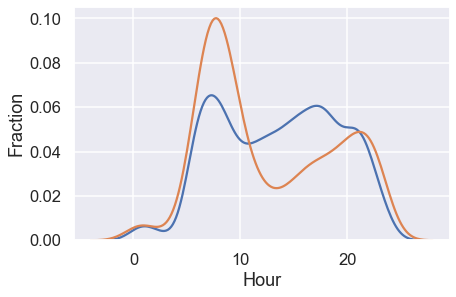

In [26]:
### BEGIN SOLUTION

# code to plot

df_year = df_trump

iPhone = df_trump.groupby('source').get_group('Twitter for iPhone')
iPhone['hour'] = df_trump.groupby('source').get_group('Twitter for iPhone')['hour']
x = iPhone['hour']

ax = sns.distplot(x, kde=True, hist=False)
ax


Andr = df_trump.groupby('source').get_group('Twitter for Android')
Andr['hour'] = df_trump.groupby('source').get_group('Twitter for Android')['hour']
y = Andr['hour']

ax1 = sns.distplot(y, kde=True, hist=False)
ax1

ax.set(xlabel='Hour', ylabel='Fraction')


### END SOLUTION

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)
    HE WOULD WRITE HIS TWEETS IN THE MORNING, and it seems as they die down later in the day.
* What time of the day the Android tweets were made by paid staff?
    Later in the night.
   

Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [27]:
import datetime
def year_fraction(date):
    start=datetime.date(date.year,1,1).toordinal()
    year_length=datetime.date(date.year+1,1,1).toordinal()-start
    return date.year+float(date.toordinal()-start)/year_length


df_trump['year']=df_trump['time'].apply(year_fraction)#should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

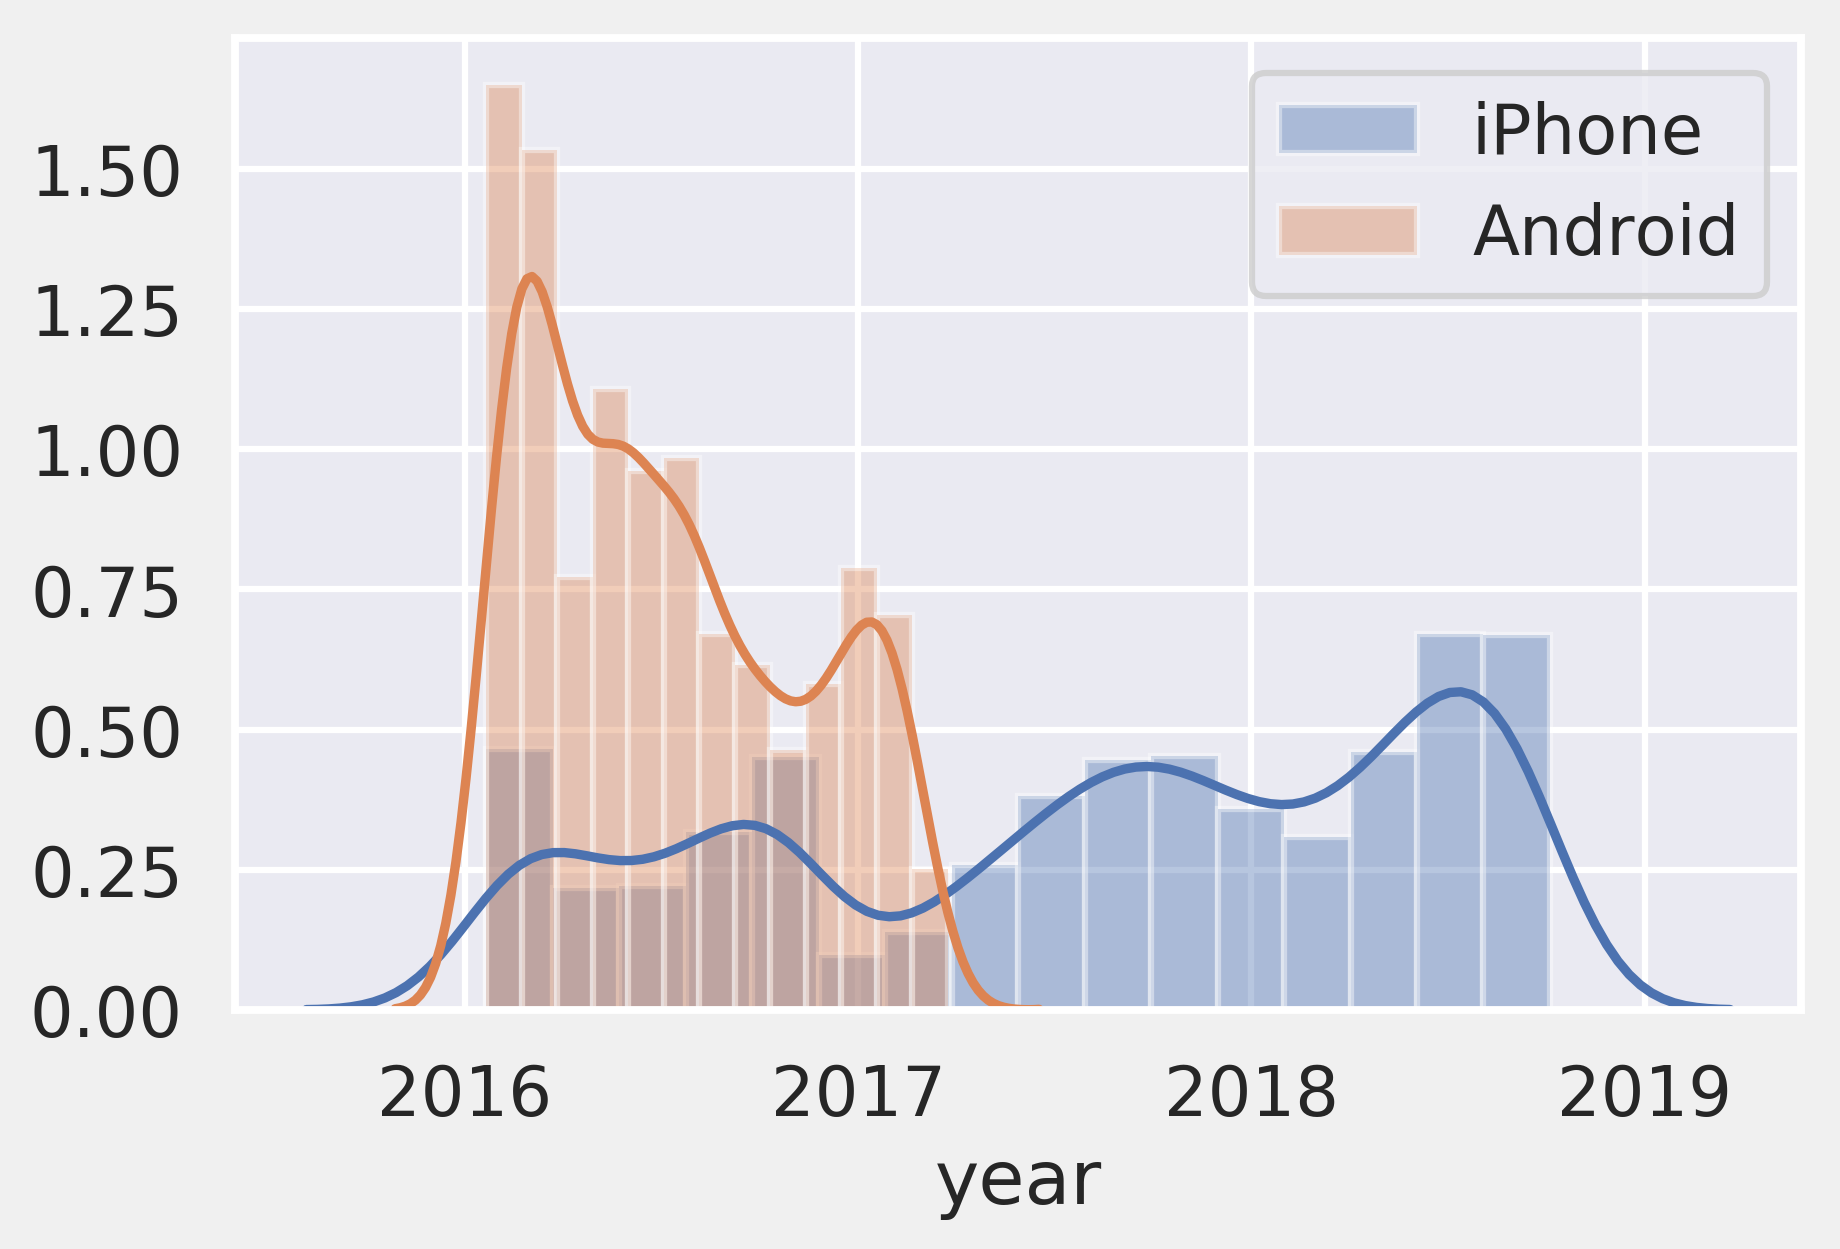

<ipython-input-28-fa7aa9468782>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone['year'] = df_trump.groupby('source').get_group('Twitter for iPhone')['year']
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-28-fa7aa9468782>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Fraction')]

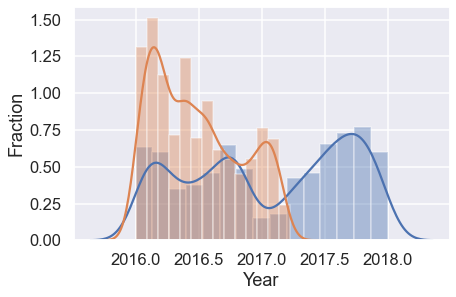

In [28]:
### BEGIN SOLUTION

iPhone = df_trump.groupby('source').get_group('Twitter for iPhone')
iPhone['year'] = df_trump.groupby('source').get_group('Twitter for iPhone')['year']
x = iPhone['year']

ax = sns.distplot(x, kde=True, hist=True)
ax


Andr = df_trump.groupby('source').get_group('Twitter for Android')
Andr['year'] = df_trump.groupby('source').get_group('Twitter for Android')['year']
y = Andr['year']

ax1 = sns.distplot(y, kde=True, hist=True)
ax1

ax.set(xlabel='Year', ylabel='Fraction')


#plt.figure(figsize=(15,15))


### END SOLUTION

## PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [29]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [30]:
### BEGIN SOLUTION

data = pd.read_csv('data/vader_lexicon.txt', sep='\t', header=None)
df_sent = data
df_sent['token']=df_sent[0]
df_sent['polarity']=df_sent[1]
df_sent = df_sent.drop([0, 1, 2, 3], axis = 1) 
df_sent = df_sent.set_index('token')
df_sent
### END SOLUTION

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [31]:
### BEGIN SOLUTION

df_trump["text"] = df_trump["text"].str.lower()

### END SOLUTION

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [32]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'


### BEGIN SOLUTION
regex = re.compile(punct_re, flags=re.IGNORECASE)  # complie into regular expression

# punctuation -> whitespace (space)

df_trump['no_punc'] = df_trump['text'].replace(to_replace=regex, value=' ') # using regex to replace the punctuation to space
df_trump
### END SOLUTION

,source,text,retweet_count,time,est_time,hour,roundtime,year,no_punc
id,,,,,,,,,
1052233253040640001,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",register to https://t.co/0pwiwchgbh! #maga🇺🇸 https://t.co/actme53tzu,5415,2018-10-16 16:22:11+00:00,2018-10-16 11:22:11-05:00,11.369722,11.0,2018.789041,register to https t co 0pwiwchgbh maga https t co actme53tzu
1052232230972678145,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",rt @whitehouse: https://t.co/rnqlpots3o,4478,2018-10-16 16:18:08+00:00,2018-10-16 11:18:08-05:00,11.302222,11.0,2018.789041,rt whitehouse https t co rnqlpots3o
1052219253384994816,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",13103,2018-10-16 15:26:33+00:00,2018-10-16 10:26:33-05:00,10.442500,10.0,2018.789041,is it really possible that bruce ohr whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier and who was used as a pawn in this whole scam witch hunt is still working for the department of justice can this really be so
1052217314463100928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,6271,2018-10-16 15:18:51+00:00,2018-10-16 10:18:51-05:00,10.314167,10.0,2018.789041,conflict between glen simpson s testimony to another house panel about his contact with justice department official bruce ohr ohr was used by simpson and steele as a back channel to get fake dossier to fbi simpson pleading fifth catherine herridge where is jeff sessions
1052213711295930368,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",14594,2018-10-16 15:04:32+00:00,2018-10-16 10:04:32-05:00,10.075556,10.0,2018.789041,federal judge throws out stormy danials lawsuit versus trump trump is entitled to full legal fees foxnews great now i can go after horseface and her 3rd rate lawyer in the great state of texas she will confirm the letter she signed she knows nothing about me a total ...
...,...,...,...,...,...,...,...,...,...
682805477168779264,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,2016-01-01 06:08:06+00:00,2016-01-01 01:08:06-05:00,1.135000,1.0,2016.000000,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus
682805320217980929,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 06:07:28+00:00,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7
682792967736848385,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,2016-01-01 05:18:23+00:00,2016-01-01 00:18:23-05:00,0.306389,0.0,2016.000000,happynewyearamerica https t co eeqb8pdrue


In [33]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

**Note that you'll get different results depending on when you pulled in the tweets.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [34]:
test = df_trump.copy()
regex = ',\s+'
tidy_format = test['text'].str.split(expand=True).stack().to_frame().reset_index()
### BEGIN SOLUTION
tidy_format = tidy_format.set_index('id')
tidy_format = tidy_format.rename(columns={ 0: 'word'})
tidy_format.replace(',','', regex=True, inplace=True)
tidy_format
### END SOLUTION

,level_1,word
id,,
1052233253040640001,0,register
1052233253040640001,1,to
1052233253040640001,2,https://t.co/0pwiwchgbh!
1052233253040640001,3,#maga🇺🇸
1052233253040640001,4,https://t.co/actme53tzu
...,...,...
682723973449289728,21,together!
682723973449289728,22,make
682723973449289728,23,america


In [35]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `sent` tables and group the final answer.


In [36]:
rex = '<.+?>'
regex = re.compile(rex)
df_trump['source'] = df_trump['source'].replace(regex, '')
# sum polarity
df_merged = pd.merge(df_trump, tidy_format, left_index = True, right_index=True)
df_merged.head()
#df_merged.drop('polarity', axis=1, inplace=True)
### BEGIN SOLUTION

df_merged = pd.merge(df_merged, df_sent, left_on='word', right_index=True)
df = df_merged
text_to_sent = df_merged.groupby(['id']).sum()['polarity']

text_to_sent = text_to_sent.to_frame('polarity')

df_merged = text_to_sent
df_merged
df_trump = df_merged
df_merged
df
### END SOLUTION

,source,text,retweet_count,time,est_time,hour,roundtime,year,no_punc,level_1,word,polarity
id,,,,,,,,,,,,
682723973449289728,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2016-01-01 00:44:14+00:00,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.000000,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,24,great,3.1
682805320217980929,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 06:07:28+00:00,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9,great,3.1
683062220490715136,Twitter for Android,"""@memeoryhead: i'm one of your biggest fans mr trump and i can't wait for you to make america great ifagain! never forget you have support!""",881,2016-01-01 23:08:18+00:00,2016-01-01 18:08:18-05:00,18.138333,18.0,2016.000000,memeoryhead i m one of your biggest fans mr trump and i can t wait for you to make america great ifagain never forget you have support,18,great,3.1
683127297457700864,Twitter for Android,thank you so much to https://t.co/8omryruvet for naming me the 2015 man of the year. this is indeed a great honor for me!,1910,2016-01-02 03:26:54+00:00,2016-01-01 22:26:54-05:00,22.448333,22.0,2016.002732,thank you so much to https t co 8omryruvet for naming me the 2015 man of the year this is indeed a great honor for me,19,great,3.1
683522343680000000,Twitter for Android,just returned from mississippi - a great evening.,1132,2016-01-03 05:36:40+00:00,2016-01-03 00:36:40-05:00,0.611111,1.0,2016.005464,just returned from mississippi a great evening,6,great,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048196883464818688,Twitter for iPhone,"the very rude elevator screamers are paid professionals only looking to make senators look bad. don’t fall for it! also, look at all of the professionally made identical signs. paid for by soros and others. these are not signs made in the basement from love! #troublemakers",53371,2018-10-05 13:03:06+00:00,2018-10-05 08:03:06-05:00,8.051667,8.0,2018.758904,the very rude elevator screamers are paid professionals only looking to make senators look bad don t fall for it also look at all of the professionally made identical signs paid for by soros and others these are not signs made in the basement from love troublemakers,4,screamers,-1.5
1049638803177127936,Twitter for iPhone,"the paid d.c. protesters are now ready to really protest because they haven’t gotten their checks - in other words, they weren’t paid! screamers in congress, and outside, were far too obvious - less professional than anticipated by those paying (or not paying) the bills!",25484,2018-10-09 12:32:46+00:00,2018-10-09 07:32:46-05:00,7.546111,8.0,2018.769863,the paid d c protesters are now ready to really protest because they haven t gotten their checks in other words they weren t paid screamers in congress and outside were far too obvious less professional than anticipated by those paying or not paying the bills,23,screamers,-1.5
1049292375330361345,Twitter for iPhone,"christopher columbus’s spirit of determination &amp; adventure has provided inspiration to generations of americans. on #columbusday, we honor his remarkable accomplishments as a navigator, &amp; celebrate his voyage into the unknown expanse of the atlantic ocean. https://t.c...",19196,2018-10-08 13:36:11+00:00,2018-10-08 08:36:11-05:00,8.603056,9.0,2018.767123,christopher columbus s spirit of determination amp adventure has provided inspiration to generations of americans on columbusday we honor his remarkable accomplishments as a navigator amp celebrate his voyage into the unknown expanse of the atlantic ocean https t c...,6,adventure,1.3


In [37]:
#assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
#assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [38]:
### BEGIN SOLUTION
df_sorted = df_merged
df_sorted = text_to_sent.sort_values(by='polarity', ascending=False)

print('Most positive tweets:')
df_sorted.head()


### END SOLUTION

Most positive tweets:


,polarity
id,
928918183104225280,61.6
939560154269405184,60.8
938102355878440960,55.2
942044657613230080,54.4
923894747793580033,47.2


In [39]:
### BEGIN SOLUTION
df_sorted = text_to_sent.sort_values(by='polarity', ascending=True)

print('Most negative tweets:')
df_sorted.head()

### END SOLUTION

Most negative tweets:


,polarity
id,
934080974773776384,-58.4
925931294705545216,-44.8
940584383605563392,-43.6
939208571253862400,-40.0
937309279257792512,-38.0


### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

In [40]:
### BEGIN SOLUTION

### END SOLUTION

##### Comment on what you observe:

#### BEGIN SOLUTION
Trump's tweets on NYT are more negative than those on Fox. Trump likes Fox more.

#### END SOLUTION

## PART 5 - Principal Component Analysis (PCA) and Twitter
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

In [41]:
!pip install nltk

In [42]:
### BEGIN SOLUTION
## code to plot the first 10 rows of the matrix
import nltk
import nltk.corpus
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
nltk.download('stopwords')
nltk.download('wordnet')

#create a dataframe called tmp to store all words appear in the tweets

stopwords = nltk.corpus.stopwords.words('English')

print(stopwords)

#remove stopwords
#tidy_format
#print(tidy_format['word'].isin(stopwords))
tmp = df[~df['word'].isin(stopwords)]
tmp
#deal with plurals
# TODO: apply lemmatizer to df_no_stop, name the result df_lem
df_lem = pd.DataFrame(tmp)
df_lem['word'] = df_lem['word'].apply(lambda s: lemmatizer.lemmatize(s))
df_lem

# Remove numbers
df_clean = pd.DataFrame(df_lem)
df_clean = df_clean[~(df_clean['word'].str.isnumeric())]
df_clean

#Remove words with only 1 or 2 length

### END SOLUTION




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryakulkarni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aryakulkarni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,source,text,retweet_count,time,est_time,hour,roundtime,year,no_punc,level_1,word,polarity
id,,,,,,,,,,,,
682723973449289728,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2016-01-01 00:44:14+00:00,2015-12-31 19:44:14-05:00,19.737222,20.0,2016.000000,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,24,great,3.1
682805320217980929,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 06:07:28+00:00,2016-01-01 01:07:28-05:00,1.124444,1.0,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9,great,3.1
683062220490715136,Twitter for Android,"""@memeoryhead: i'm one of your biggest fans mr trump and i can't wait for you to make america great ifagain! never forget you have support!""",881,2016-01-01 23:08:18+00:00,2016-01-01 18:08:18-05:00,18.138333,18.0,2016.000000,memeoryhead i m one of your biggest fans mr trump and i can t wait for you to make america great ifagain never forget you have support,18,great,3.1
683127297457700864,Twitter for Android,thank you so much to https://t.co/8omryruvet for naming me the 2015 man of the year. this is indeed a great honor for me!,1910,2016-01-02 03:26:54+00:00,2016-01-01 22:26:54-05:00,22.448333,22.0,2016.002732,thank you so much to https t co 8omryruvet for naming me the 2015 man of the year this is indeed a great honor for me,19,great,3.1
683522343680000000,Twitter for Android,just returned from mississippi - a great evening.,1132,2016-01-03 05:36:40+00:00,2016-01-03 00:36:40-05:00,0.611111,1.0,2016.005464,just returned from mississippi a great evening,6,great,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048196883464818688,Twitter for iPhone,"the very rude elevator screamers are paid professionals only looking to make senators look bad. don’t fall for it! also, look at all of the professionally made identical signs. paid for by soros and others. these are not signs made in the basement from love! #troublemakers",53371,2018-10-05 13:03:06+00:00,2018-10-05 08:03:06-05:00,8.051667,8.0,2018.758904,the very rude elevator screamers are paid professionals only looking to make senators look bad don t fall for it also look at all of the professionally made identical signs paid for by soros and others these are not signs made in the basement from love troublemakers,4,screamer,-1.5
1049638803177127936,Twitter for iPhone,"the paid d.c. protesters are now ready to really protest because they haven’t gotten their checks - in other words, they weren’t paid! screamers in congress, and outside, were far too obvious - less professional than anticipated by those paying (or not paying) the bills!",25484,2018-10-09 12:32:46+00:00,2018-10-09 07:32:46-05:00,7.546111,8.0,2018.769863,the paid d c protesters are now ready to really protest because they haven t gotten their checks in other words they weren t paid screamers in congress and outside were far too obvious less professional than anticipated by those paying or not paying the bills,23,screamer,-1.5
1049292375330361345,Twitter for iPhone,"christopher columbus’s spirit of determination &amp; adventure has provided inspiration to generations of americans. on #columbusday, we honor his remarkable accomplishments as a navigator, &amp; celebrate his voyage into the unknown expanse of the atlantic ocean. https://t.c...",19196,2018-10-08 13:36:11+00:00,2018-10-08 08:36:11-05:00,8.603056,9.0,2018.767123,christopher columbus s spirit of determination amp adventure has provided inspiration to generations of americans on columbusday we honor his remarkable accomplishments as a navigator amp celebrate his voyage into the unknown expanse of the atlantic ocean https t c...,6,adventure,1.3


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [43]:
### BEGIN SOLUTION
words = df_clean['word'].value_counts(ascending=False)
#words
words = words.reset_index()['index'][:50].to_list()
words
# word to index
w_to_idx = {}
for i in range(len(words)):
    w_to_idx[words[i]] = i
    
X = np.zeros((1000, 50))


# select 1000 row id
selected_tweets = df_clean.index.unique()[:1000]
#selected_tweets

# TODO: use the dataframe we created before (df_merged) to create the document-frequency matrix X



for i in range(1000):
    df_clean_i = df_clean.loc[[selected_tweets[i]]]
    for j in range(len(df_clean_i)):
        #print(j['word'])
        #print(df_clean_i.iloc[j])
        #print(df_clean_i.iloc[j]['word'])
        if df_clean_i.iloc[j]['word'] in words:
            X[i, w_to_idx[df_clean_i.iloc[j]['word']]] += 1
X
mu = X.mean(axis=0)

X_ = X - mu

Sigma = X_.T @ X_ / len(X_)

import scipy.linalg as linalg
u, lam, uh = linalg.svd(Sigma)






### END SOLUTION

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

![title](images/pca.png)



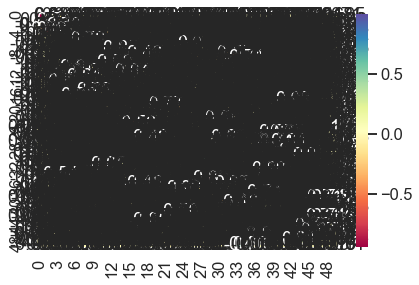

In [44]:
### BEGIN SOLUTION
ax = sns.heatmap(u, annot=True, cmap='Spectral')
plt.show()


### END SOLUTION

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


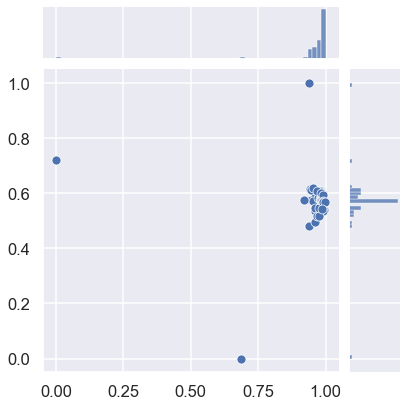

In [45]:
### BEGIN SOLUTION
pca1 = u[:,0]
pca2 = u[:,1]

# no need to normalize in project. This is just to bypass some numerical errors
pca1 = (pca1 - pca1.min()) / (pca1.max() - pca1.min())

pca2 = (pca2 - pca2.min()) / (pca2.max() - pca2.min())

sns.jointplot(pca1,pca2)

### END SOLUTION

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

In [46]:
#top_20 = ...
### BEGIN SOLUTION
ty = df
df = df.sort_values(by=['retweet_count'], ascending=False)
df['freq'] = df.groupby('retweet_count')['retweet_count'].transform('count')
df = df.loc[df['freq'] > 25]
df.drop_duplicates(subset='word', keep="first")

temp = df.head(n=20)
rt = temp[['retweet_count', 'word', 'freq']]
rt
### END SOLUTION

,retweet_count,word,freq
id,,,
947592785519173637,42663,dishonest,26
947592785519173637,42663,great,26
947592785519173637,42663,great,26
947592785519173637,42663,dishonest,26
947592785519173637,42663,want,26
947592785519173637,42663,smarter,26
947592785519173637,42663,healthy,26
947592785519173637,42663,supporters,26
947592785519173637,42663,supporters,26


### Task 6.2
Plot a bar chart of your results:

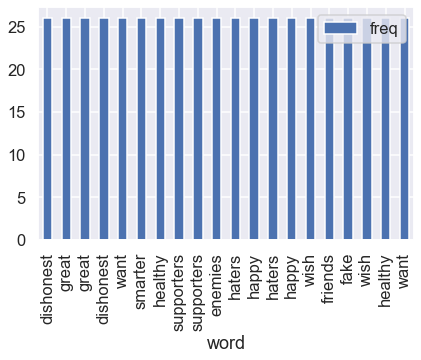

In [47]:
### BEGIN SOLUTION

ax = rt.plot.bar(x='word', y='freq', rot=90)

### BEGIN SOLUTION

## PART 7 - Conclusion (Optional for Individual)
What else can we do? Let us ask some open ended questions.

We can determine how frequently he tweets during the months up to the election vs other times.

### Task 7.1
"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
      - False, even with this un is still popular, so nouns don't matter as much.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
      - False, some of the tweets may have #great but not great, so this may lower the average of words in each tweet
1. We didn't account for the fact that Trump's follower count has increased over time.
      - True, by more followers, the words he uses will be more popular

### Task 7.2
Using the `df_trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets. Do some plots and discuss. You can add more cells here as needed.


<ipython-input-57-802d4b7ecc32>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone['year'] = ty.groupby('source').get_group('Twitter for iPhone')['year']
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'How many times Trump tweeted via iPhone over 1.5 years')

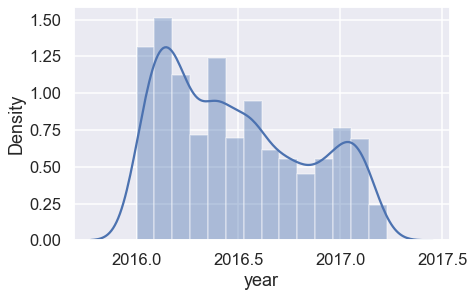

In [57]:
#### BEGIN SOLUTION
#plt.figure(figsize=(20,20))
ty

iPhone = ty.groupby('source').get_group('Twitter for iPhone')
iPhone['year'] = ty.groupby('source').get_group('Twitter for iPhone')['year']
x = iPhone['hour']


ax1 = sns.distplot(y, kde=True, hist=True)
ax1

ax.set(xlabel='Year', ylabel='RT Density')
ax.set_title("How many times Trump tweeted via iPhone over 1.5 years")

#### END SOLUTION

#### BEGIN SOLUTION
Discussion: Trumps decreasing use of the iPhone.

Trump started tweeting with an iPhone, which shows that his staff was dissmissed more and more and so he started tweeting himself through his personal phone.
#### END SOLUTION

### Find Something interesting (Optional for Individuals)
Is there still something interesting to find in this data set? Use your own imagination to ask some good questions. Don't be bias and look for the answer in data. Don't ask us what we want, because we do not know either. This will be for EXTRA CREDIT for individuals but part of the regular assignment for groups. Add any cells below.


In [102]:
#### BEGIN SO


<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as <your_section>_<your_netID>_midsemester.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; midsemester <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2018 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez